# Quality Matters: <font color=red>Red Wine</font>


## Dataset Information

### Citation

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. 

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
            [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
            [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib
     
### Summary

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent).

### Features
   - **fixed acidity (nonvolatile acids)**: acids that do not evaporate when wine is heated.   
   - **volatile acidity**: acids that evaporate when wine heated, when in high amounts can give an unpleasant taste.
   - **citric acid**: type of fixed acid, added to wines to increase acidity or give a 'fresh' flavor. 
   - **residual sugar**: any natural grape sugars that are leftover after fermentation is done.
   - **chlorides**: contribute to the saltiness of the wine.
   - **free sulfur dioxide**: component of 'total sulfur dioxide', used to protect against microbes and oxidation.
   - **total sulfur dioxide**: free sulfur dioxide + bound sulfur dioxide  
   - **density**: used as a measure of the conversion of sugar to alcohol (ie. finished wine has less sugar but lots of alcohol and thus has a lower density)
   - **pH**: describes how acidic (0-6) or basic (8-14) the wine is. 
   - **sulphates**: a wine additive which can contribute to sulfur dioxide levels, which acts as an antimicrobial and antioxidant
   - **alcohol**: percentage of alcohol present in the wine.

### Target variable
   - **quality**: score given to the wine between 0 (lowest) and 10 (highest).
   
### Goal 
As a consumer, I want make the right choice of purchasing good quality wine. First off, I want to learn about what characteristics make a good wine, thus increasing my knowledge when purchasing wine. Secondly, since I am the one purchasing the wine, I would like my machine to make the correct choice as much as possible, thus saving me money while keeping me satisfied, in the long term. 

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
red_wine = pd.read_csv('../Wine Quality/winequality-red.csv', sep = ';')
# rename variables: replace space with underscores (makes it easier to reference)
red_wine.columns = [c.lower().replace(' ', '_') for c in red_wine.columns]
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# colors I will be using in this notebook
OrRd = sns.color_palette("OrRd_r", n_colors=len(red_wine.columns))
dark_red = OrRd[0]
light_red = OrRd[8]

# ignore warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
# Check for null values
print('Red Wine: ')
print(red_wine.isnull().any())

Red Wine: 
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [5]:
print("Red Wine Df Dimensions:", red_wine.shape)

Red Wine Df Dimensions: (1599, 12)


In [6]:
# get datatypes
print("Red Wine datatypes: \n" )
print(red_wine.dtypes)

Red Wine datatypes: 

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# statistics for target variable
print("Red wine 'quality' statistics:")
red_wine['quality'].describe()

Red wine 'quality' statistics:


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

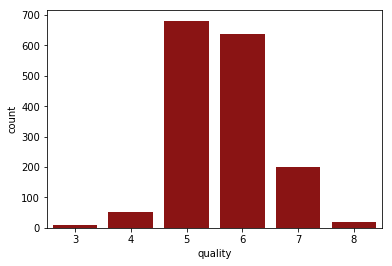

In [8]:
sns.countplot(x=red_wine['quality'], color = dark_red)
plt.show()

**Observation**: There are more wines that are rated 5 and 6. This imbalance issue will become more relevant when we perform classification. 

Text(0.5, 1.0, 'Correlation Heatmap for Red Wine')

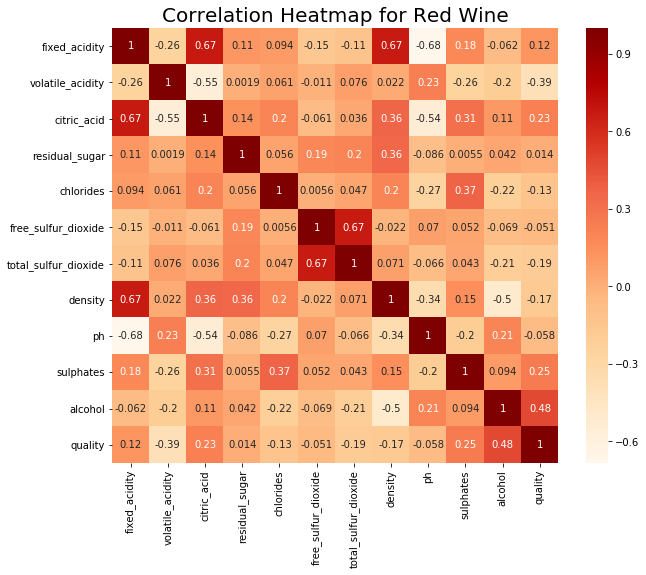

In [9]:
# see correlations of red wine features
red_wine_corr = red_wine.corr()
red_wine_corr = (red_wine_corr)
plt.figure(figsize=(10,8))
sns.heatmap(red_wine_corr, 
            xticklabels = red_wine_corr.columns.values,
            yticklabels = red_wine_corr.columns.values,
            annot=True,
            cmap = 'OrRd')
plt.title('Correlation Heatmap for Red Wine', fontsize = 20)


In [10]:
# display quality correlations in descending order
print('Red Wine Quality Correlations: \n')
# exclude last index because quality correlates 100% with itself
print(red_wine_corr['quality'][:-1].sort_values(ascending = False),'\n')


Red Wine Quality Correlations: 

alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
ph                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64 



**Observation**: Alcohol, sulphates, citric_acid, fixed_acidity, and residual sugars postively correlate with the quality of red wine. Let's now explore those features!

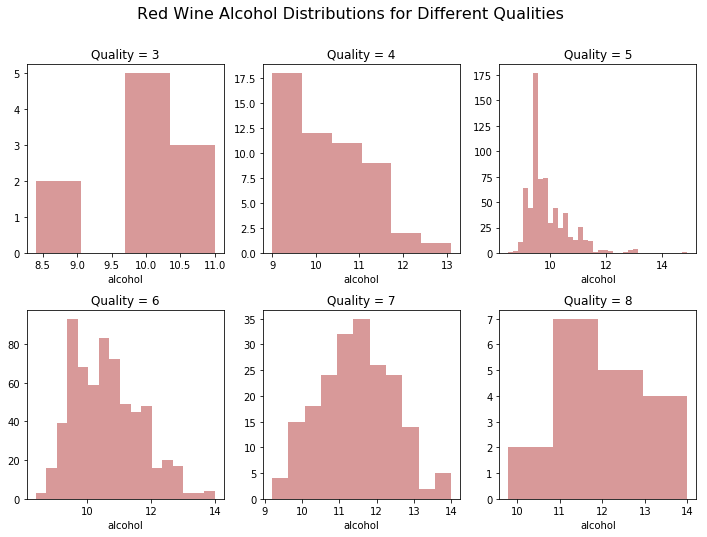

In [11]:
# comparing alcohol content in different quality red wines
red_qual_unique = np.sort(red_wine.quality.unique())
nrows = 2
ncols = 3
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(12, 8))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Red Wine Alcohol Distributions for Different Qualities', fontsize=16)

for qual, axis in zip(red_qual_unique, axes):
    sns.distplot(red_wine.alcohol[red_wine.quality == qual], kde = False, color=dark_red, ax=axis).set_title('Quality = {}'.format(str(qual)))


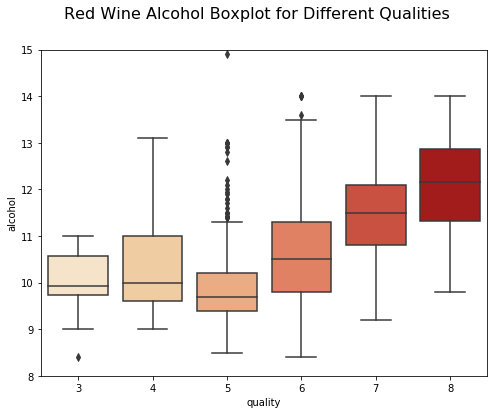

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = red_wine.quality, y = red_wine.alcohol, palette = 'OrRd' )
plt.suptitle('Red Wine Alcohol Boxplot for Different Qualities', fontsize=16)
fig.axis(ymin=8, ymax=15);

**Observation**: I notice that in higher quality wines, there tends to be a higher alcohol content. This makes sense, as the presence of alcohol, in my experience, tends to be stronger in higher quality wines. 

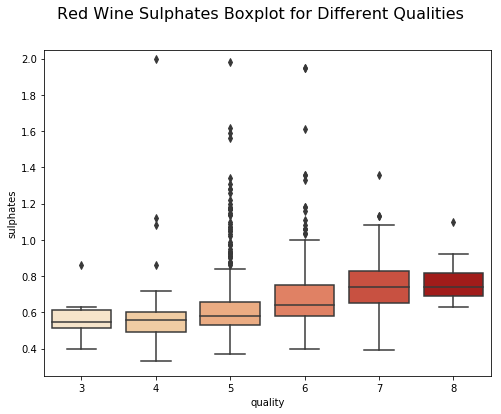

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = red_wine.quality, y = red_wine.sulphates, palette = 'OrRd' )
plt.suptitle('Red Wine Sulphates Boxplot for Different Qualities', fontsize=16)
fig.axis(ymin=0.25, ymax=2.05);

**Observation**: Not as strong of an indicator as alcohol, but we see that sulphates content tend to be higher in better quality wines.

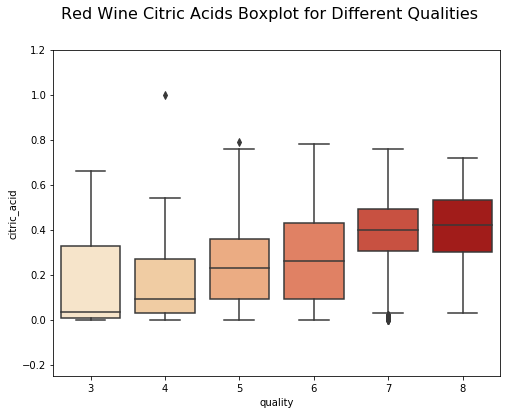

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = red_wine.quality, y = red_wine.citric_acid, palette = 'OrRd' )
plt.suptitle('Red Wine Citric Acids Boxplot for Different Qualities', fontsize=16)
fig.axis(ymin=-0.25, ymax=1.2);

**Observation**: There definitely is a positive correlation here with citric acids, but I also see that the range of citric acids seems to be roughly similary for all qualities of wines (0% - 0.8%).

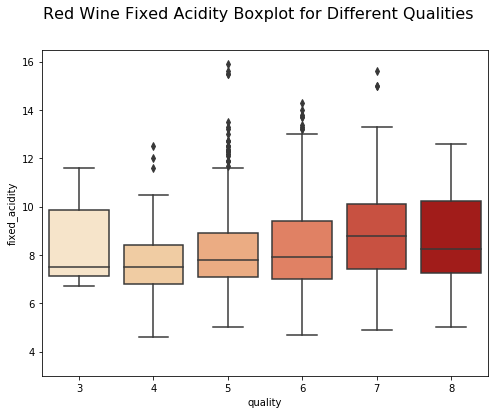

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = red_wine.quality, y = red_wine.fixed_acidity, palette = 'OrRd' )
plt.suptitle('Red Wine Fixed Acidity Boxplot for Different Qualities', fontsize=16)
fig.axis(ymin=3, ymax=16.5);

**Observation**: Some correlation, but not too much.

## Data Preprocessing

In [16]:
# get frequencies of wine qualities
print(red_wine.groupby(red_wine.quality).quality.count())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


### Approach
There is a class imbalance issue. If we had roughly equal amounts of samples, it would be possible to perform multi-classification. 

Since the goal of our project is to detect good quality wine, let's transform this task into a binary classification task, where we will place wines in one of two bins based on quality: bad (3-6) and good (7-8). Now, the task becomes: are we able to distinguish between 'good' and 'bad' wines based on their features.

In [17]:
# creating bins for 'good' and 'bad' quality wine
# Red Wine: 2 bins 'bad'(3-6) and 'good'(7-8)
bins_red = (2, 6, 8)

# 0: 'bad' wines, 1: 'good' wines
groups = [0, 1]
red_wine.quality = pd.cut(red_wine.quality, bins = bins_red, labels = groups)

Text(0.5, 1.0, 'Red Wine Quality Distribution (w/ Bins)')

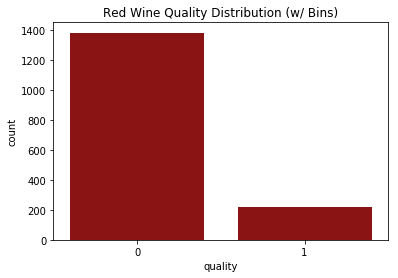

In [18]:
sns.countplot(x=red_wine.quality, color = OrRd[0]).set_title('Red Wine Quality Distribution (w/ Bins)')

**Note**: There is still an class imbalance (more 'bad' wines than 'good' wines). This will affect what metric we will be using to judge our classifiers (we will cover shortly).

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# 60% training, 40% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=10)

# optimize performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# convert back to df, add labels to columns
X_train = pd.DataFrame(X_train, columns = red_wine.drop('quality', axis =1).columns)
X_test = pd.DataFrame(X_test, columns = red_wine.drop('quality', axis =1).columns)

## Functions

Here I will define the functions I will be using when evaluating the classifiers. 

**plot_confusion_matrix**: see number of true positives, true negatives, false positive, false negatives produced by classifier.

**train_vs_test_plot**: train a classifier and plot it's precision (metric we will be using) against a certain parameter (used for parameter tuning)

**see_decision_boundaries**: see the decision boundary made by the classifier, useful for detecting overfitting. 


In [20]:
def plot_confusion_matrix(confusion_matrix):
    confusion_matrix_df = pd.DataFrame(confusion_matrix, index = [0,1], columns = [0,1])
    confusion_matrix_df.index.name = 'True Class'
    confusion_matrix_df.columns.name = 'Predicted Class'
    plt.figure(figsize = (5,5))
    # increase font size
    sns.set(font_scale = 1.4)
    sns.heatmap(confusion_matrix_df, 
            xticklabels = True,
            yticklabels = True,
            fmt = '.5g',
            cmap = 'OrRd',
            cbar = False,
            annot=True,)
    plt.title("Confusion Matrix", fontsize = 20)
    # set font back to normal
    sns.set(font_scale = 1)

In [21]:
def train_vs_test_plot(clf_list, param, barplot = False):
    # store results
    results_train = []
    results_test = []
    for clf in clf_list:
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        score_train = precision_score(y_train, y_pred_train)
        score_test = precision_score(y_test, y_pred_test)
        # store as tuple for convenient access
        results_train.append((getattr(clf, param), score_train))
        results_test.append((getattr(clf, param), score_test))
    
    # line plot
    if barplot is False:    
        plt.plot([tup[0] for tup in results_train], [tup[1] for tup in results_train], label='Train Set', color = light_red)
        plt.plot([tup[0] for tup in results_test], [tup[1] for tup in results_test],  label='Test Set', color = dark_red)
        plt.xlabel('{}'.format(param))
        plt.ylabel('Precision')
        plt.title('Train VS Test Scores')
        plt.legend(loc="lower right")
        plt.show()
    # bar plot
    else: 
        sns.set(font_scale = 1.2)
        sns.barplot([tup[0] for tup in results_train], [tup[1] for tup in results_train], label = 'Train', color = light_red)
        sns.barplot([tup[0] for tup in results_test], [tup[1] for tup in results_test], label = 'Test', color = dark_red)
        plt.suptitle('{} vs. Precision'.format(param))
        plt.legend(loc="upper left")
        plt.show()
        sns.set(font_scale = 1)

    max_train = max(results_train,key=lambda item:item[1])
    max_test = max(results_test,key=lambda item:item[1])

    # get max precision
    print('Highest Precision (Train): {} ({} = {})'.format(max_train[1], param, max_train[0]))
    print('Highest Precision (Test): {} ({} = {})'.format(max_test[1], param, max_test[0]))

In [22]:
def see_decision_boundaries(clf_list, param, figsize, nrows, ncols):
    plt.figure(figsize=figsize)
    index = 0
    for clf in clf_list:
        X = X_train[['alcohol', 'sulphates']]
        y = y_train.as_matrix(columns=None)
        clf.fit(X, y)
        index += 1
        plt.subplot(nrows, ncols, index)
        plot_decision_regions(X=X.values, 
                              y=y,
                              clf=clf,
                              colors = 'rosybrown,firebrick',
                              legend=2)
        # Update plot object with X/Y axis labels and Figure Title
        plt.xlabel(X.columns[0], size=14)
        plt.ylabel(X.columns[1], size=14)
        plt.title('{} = {}'.format(param, getattr(clf, param), fontsize=18))

## Classifiers

### Possible Metrics
- **accuracy**: total samples correctly classified out of the total number of samples
- **ROC-AUC**: compares the True Positive Rate (TPR) and False Positive Rate (FPR). Useful for distinguishing between classes. 
- **precision**: of the amount of samples the model predicted 'good', how many of those samples' true class is 'good'. <br>
$\frac{TP}{TP + FP}$
- **recall**: of the amount of samples the model predicted as 'good', how many of the 'good' samples did the model identify in the dataset. <br>
$\frac{TP}{TP + FN}$


We need to choose a metric that is unaffected by the class imbalance we encountered when making the 'good' and 'bad' wine bins. Accuracy and ROC-AUC take into account the number of samples in each corresponding class, making them not attractive metrics. Thus, we are left with precision and recall, as both of these metrics are unaffected by the number of 'bad' wine samples and instead focuses on 'good' wine samples. I will be using **precision** as a metric to judge our models because I believe that being able to pinpoint good quality wines will help me save money in the long term, instead of going through trial and error and tasting many different types of wine.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions

### Random Forest
Ensemble learning method that consists of many decision trees. A certain amount of decision trees are built and each 'vote' for the corresponding class the new sample belongs to.


In [24]:
# define baseline model
rf_baseline = RandomForestClassifier(random_state = 10, n_estimators = 300)
rf_baseline.fit(X_train, y_train)
y_pred = rf_baseline.predict(X_test)

print(classification_report(y_test, y_pred, digits = 3))

             precision    recall  f1-score   support

          0      0.895     0.976     0.934       549
          1      0.683     0.308     0.424        91

avg / total      0.865     0.881     0.861       640



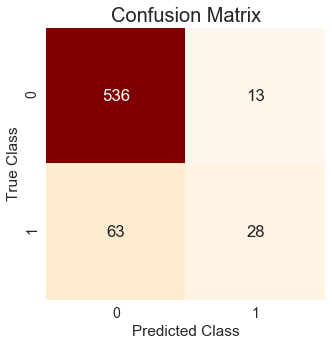

In [25]:
y_pred = rf_baseline.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

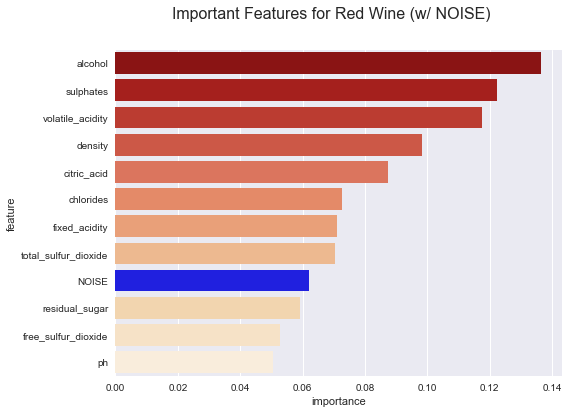

In [26]:
# add noise
X_train_noise = pd.DataFrame(X_train).copy()
X_train_noise['NOISE'] = np.random.normal(0, 1, X_train_noise.shape[0])

# run random forest 100 times to get average feature importance
rf_noise = RandomForestClassifier(n_estimators = 300, n_jobs = 100, random_state = 10)
rf_noise.fit(X_train_noise, y_train)
# convert to df + rename cols
important_features = pd.DataFrame(rf_noise.feature_importances_,
                                     index = X_train_noise.columns,
                                     columns = ['importance']).sort_values('importance', ascending = False)
important_features = important_features.reset_index()
important_features.rename(columns = {'index':'feature'}, inplace = True) 

# assign color based on feature
c_palette = ['b' if ( feature == 'NOISE') else OrRd[color] for feature, color in zip(important_features.feature, important_features.index)]

f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale = 1.2)
sns.barplot(x = 'importance', y = 'feature', data = important_features, palette = c_palette)
plt.suptitle('Important Features for Red Wine (w/ NOISE)', fontsize = 16)
sns.set(font_scale = 1)

The purpose of this was to figure out the important features (generated by the Random Forest) and see how they stacked up against each other. Then, I added some random noise to see which features would actually be significant and which would be not as much. Now, I want to train the model with the reduced features (all features higher than NOISE) and see if that were to produce a better model.

In [27]:
# test model with reduced features
# find reduced_features
noise_index = important_features[important_features.feature == 'NOISE'].index[0] + 1
last_index = important_features[-1:].index[0] + 1
dropped_features = []
[dropped_features.append(important_features.iloc[index].feature) for index in range(noise_index, last_index)]

# train model with reduced features
X_train_reduced = X_train.drop(dropped_features, axis = 1)
X_test_reduced = X_test.drop(dropped_features, axis = 1)
rf_reduced = RandomForestClassifier(random_state = 10, n_estimators = 300)
rf_reduced.fit(X_train_reduced, y_train)
y_pred = rf_reduced.predict(X_test_reduced)
print(classification_report(y_test, y_pred, digits = 3))

             precision    recall  f1-score   support

          0      0.893     0.973     0.931       549
          1      0.643     0.297     0.406        91

avg / total      0.857     0.877     0.856       640



Actually reducing features lowers precision and recall. It seems as if all feature are contributing postively towards our scores, thus, I will be using all features for models going forward. 

#### Parameters to Tune:
- **max_depth**: depth size of a tree
- **n_estimators**: number of trees in the forest. Generally, the more trees the better accuracy, but slower computation.
- **max_features**: max number of features that the algorithm can assign to an individual tree.
- **min_samples_leaf**: The minimum number of samples in newly created leaves. Try [1,2,3]. If 3 is best, try higher numbers.


#### Max Depth

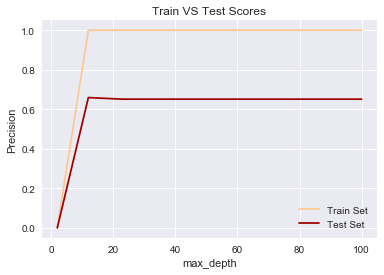

Highest Precision (Train): 1.0 (max_depth = 12)
Highest Precision (Test): 0.6590909090909091 (max_depth = 12)


In [28]:
max_depths = [int(x) for x in np.linspace(start = 2, stop = 100, num = 10)]
clf_list = []
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth, n_jobs=-1, n_estimators = 300, random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'max_depth')

#### min_samples_split

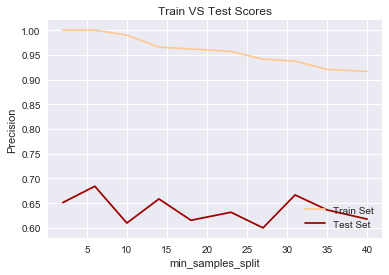

Highest Precision (Train): 1.0 (min_samples_split = 2)
Highest Precision (Test): 0.6842105263157895 (min_samples_split = 6)


In [29]:
min_samples_splits = [int(x) for x in np.linspace(start = 2, stop = 40, num = 10)]
clf_list = []
for splits in min_samples_splits:
    clf = RandomForestClassifier(min_samples_split = splits, n_jobs=-1, n_estimators = 300, random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'min_samples_split')

#### n_estimators

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 25)]
clf_list = []
for trees in n_estimators:
    clf = RandomForestClassifier(n_estimators = trees, n_jobs=-1, random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'n_estimators')

#### max_features

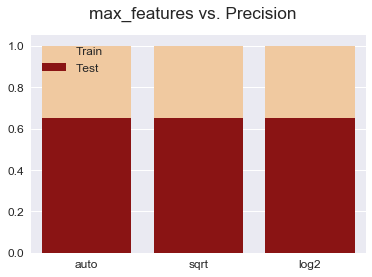

Highest Precision (Train): 1.0 (max_features = auto)
Highest Precision (Test): 0.6511627906976745 (max_features = auto)


In [30]:
max_features = ['auto', 'sqrt', 'log2', None]
clf_list = []
for max_feature in max_features:
    clf = RandomForestClassifier(max_features=max_feature, n_estimators=300, n_jobs=-1, random_state=12)
    clf_list.append(clf)
    
train_vs_test_plot(clf_list, 'max_features', barplot = True)

#### min_samples_leaf

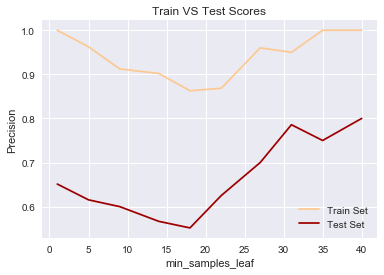

Highest Precision (Train): 1.0 (min_samples_leaf = 1)
Highest Precision (Test): 0.8 (min_samples_leaf = 40)


In [31]:
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 40, num = 10)]
clf_list = []
for samples in min_samples_leaf:
    clf = RandomForestClassifier(min_samples_leaf = samples, n_jobs=-1, n_estimators = 300, random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'min_samples_leaf')

In [32]:
# Trying hand-picked parameters
rf = RandomForestClassifier(max_depth = 12,
                            min_samples_split = 6,
                            n_estimators = 104,
                            max_features = 'auto',
                            min_samples_leaf = 30,
                            random_state = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('-- Tuned Hyperparameter Random Forest --')
print(classification_report(y_test,y_pred,digits = 3))

-- Tuned Hyperparameter Random Forest --
             precision    recall  f1-score   support

          0      0.875     0.991     0.929       549
          1      0.722     0.143     0.239        91

avg / total      0.853     0.870     0.831       640



We were able to increase our precision for 1 ('good' wines) by about 10%! Although this does come with a cost-- the recall score is significantly lower.

y_pred = rf.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Logistic Regression
Supervised machine learning algorithm that returns a probability instead of a prediction.

#### Parameters to tune
- **penalty**: regularization term, either L1 (Lasso Regression) or L2 (Ridge Regression).
- **C**: inverse strength of regularization (ie. smaller values specify stronger regularization)
- **class_weights**: weights given to each class, which determines how much impact a sample has in moving determining the decision boundary. 

In [34]:
# define baseline logistic regression model
logit_baseline = LogisticRegression(random_state = 10)
logit_baseline.fit(X_train, y_train)
y_pred = logit_baseline.predict(X_test)

print('-- Logistic Regression Baseline --')
print(classification_report(y_test, y_pred, digits = 3))

-- Logistic Regression Baseline --
             precision    recall  f1-score   support

          0      0.889     0.960     0.923       549
          1      0.532     0.275     0.362        91

avg / total      0.838     0.863     0.843       640



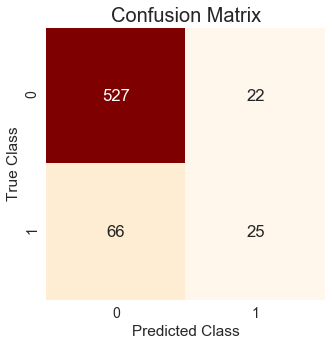

In [35]:
# plot confusion matrix 
y_pred = logit_baseline.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

#### C & penalty

-- L1 Regularization --



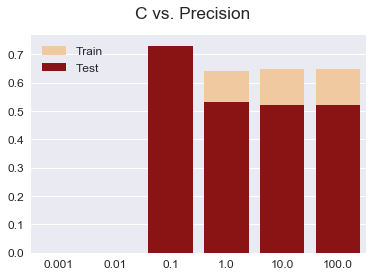

Highest Precision (Train): 0.6470588235294118 (C = 10)
Highest Precision (Test): 0.7307692307692307 (C = 0.1)

-- L2 Regularization --



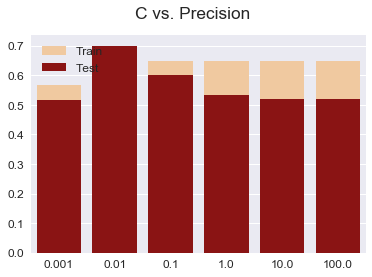

Highest Precision (Train): 0.6976744186046512 (C = 0.01)
Highest Precision (Test): 0.7 (C = 0.01)


In [36]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100]
clf_list = []
for c in c_list:
    clf = LogisticRegression(C = c, penalty = 'l1', random_state = 12)
    clf_list.append(clf)

print('-- {} Regularization --\n'.format('L1') ) 
train_vs_test_plot(clf_list, 'C', barplot = True)

clf_list = []
for c in c_list:
    clf = LogisticRegression(C = c, penalty = 'l2', random_state = 12)
    clf_list.append(clf)

print('\n-- {} Regularization --\n'.format('L2') )
train_vs_test_plot(clf_list, 'C', barplot = True)

-- Logistic Decision Boundaries w/ L1 Regualrization -- 


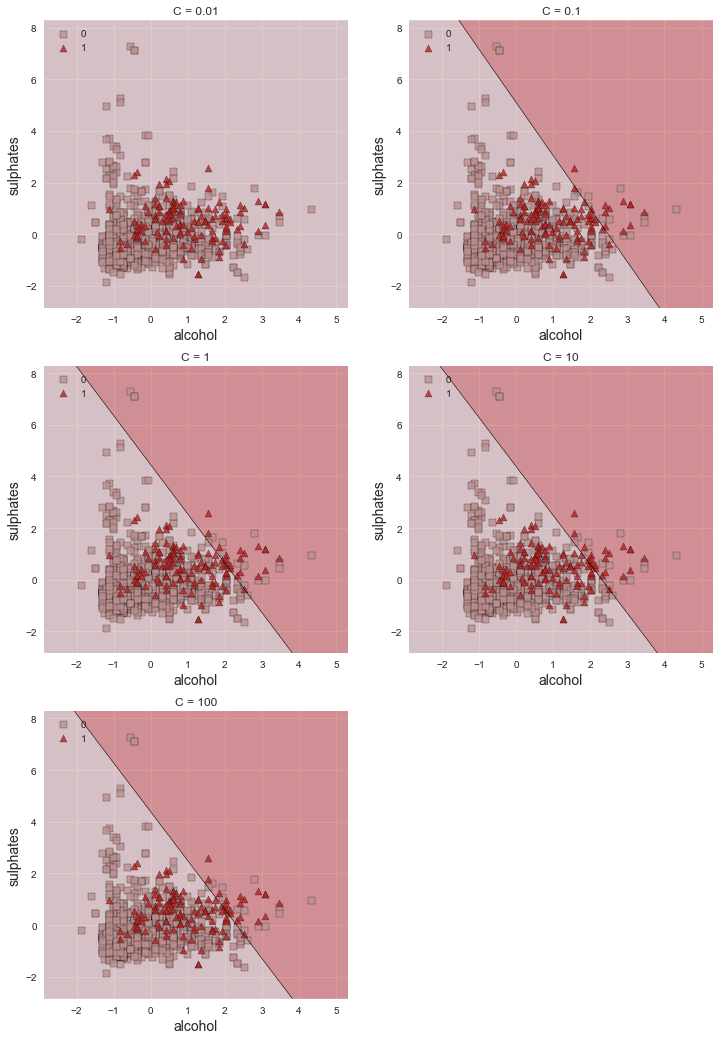

In [37]:
c_list = [0.01, 0.1, 1, 10, 100]
clf_list = []
for c in c_list:
    clf = LogisticRegression(C = c, penalty = 'l1', random_state = 10)
    clf_list.append(clf)

print('-- Logistic Decision Boundaries w/ L1 Regualrization -- ')
see_decision_boundaries(clf_list = clf_list, 
                        param = 'C', 
                        figsize = (12,18), 
                        nrows = 3, 
                        ncols = 2)  




-- Logistic Decision Boundaries w/ L2 Regualrization -- 


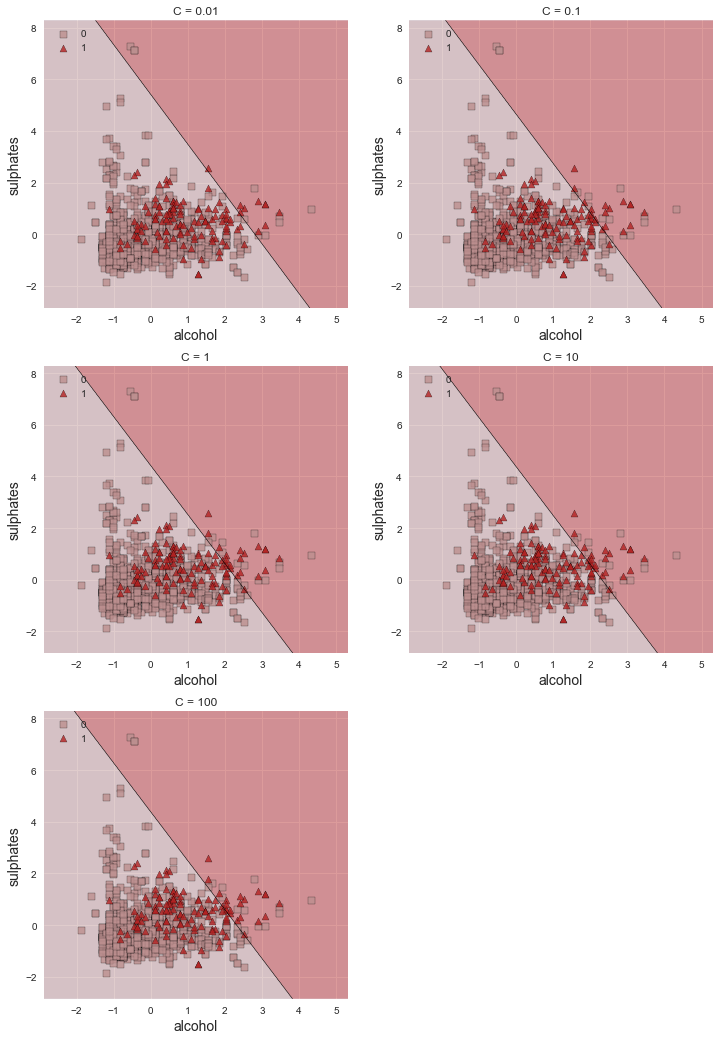

In [38]:
c_list = [0.01, 0.1, 1, 10, 100]
clf_list = []
for c in c_list:
    clf = LogisticRegression(C = c, penalty = 'l2', random_state = 10)
    clf_list.append(clf)
print('-- Logistic Decision Boundaries w/ L2 Regualrization -- ')
see_decision_boundaries(clf_list = clf_list, 
                        param = 'C', 
                        figsize = (12,18), 
                        nrows = 3, 
                        ncols = 2)  

L2 regularization has a higher precision score than L1 by not much. C value that produced that best precision (for L2) shifted pretty far to the right, making the decision boundary look overly safe.   

#### class_weights

In [50]:
results = []
class_weights = ['balanced', None, {0: 0.7, 1: 0.3}, {0: 0.3, 1: 0.7}]
print('-- Class Weights --')
for weight in class_weights:
    model = LogisticRegression(C = 0.01, penalty = 'l2', class_weight = weight, random_state = 12)
    model.fit(X_train, y_train)
    score = precision_score(y_test, model.predict(X_test))
    results.append(score)
    print('{}: {}'.format(weight, score))
    


-- Class Weights --
balanced: 0.3391304347826087
None: 0.7
{0: 0.7, 1: 0.3}: 0.0
{0: 0.3, 1: 0.7}: 0.4407894736842105


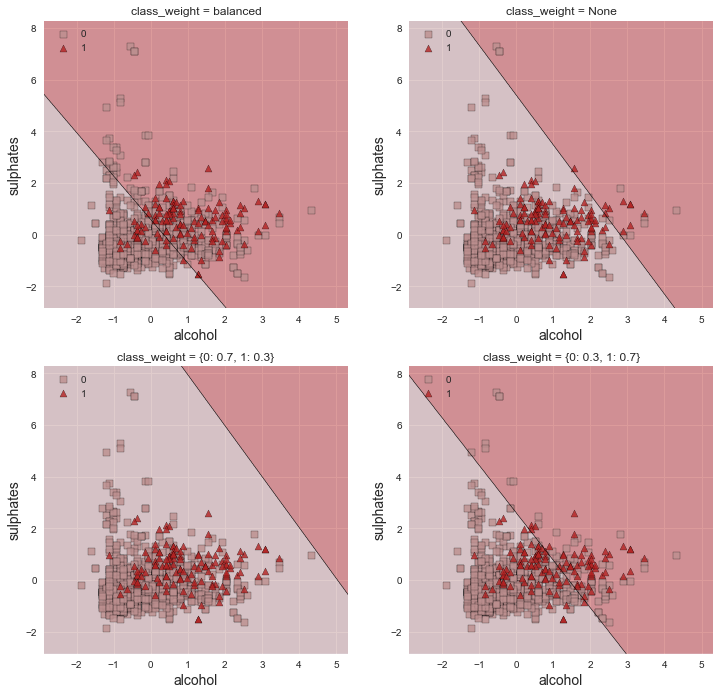

In [51]:
class_weights = ['balanced', None, {0: 0.7, 1: 0.3}, {0: 0.3, 1: 0.7}]
clf_list = []
for weight in class_weights:
    clf = LogisticRegression(C = 0.01, penalty = 'l2', class_weight = weight, random_state = 12)
    clf_list.append(clf)
see_decision_boundaries(clf_list = clf_list, 
                        param = 'class_weight', 
                        figsize = (12,18), 
                        nrows = 3, 
                        ncols = 2)  

In [52]:
logit = LogisticRegression(C = 0.01, penalty = 'l2', class_weight = None, random_state = 10)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_test,y_pred, digits = 3))

             precision    recall  f1-score   support

          0      0.885     0.984     0.932       549
          1      0.700     0.231     0.347        91

avg / total      0.859     0.877     0.849       640



Woo, able to increase precision by 17%!

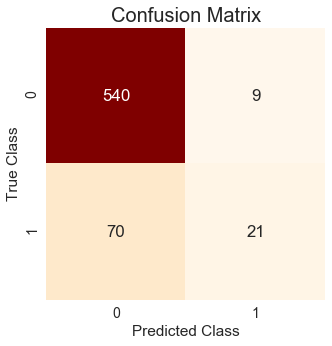

In [53]:
y_pred = logit.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Support Vector Machines
Supervised machine learning algorithm that combines the concepts of max margin and hinge loss to form a hyperplane to divide the classes. Can use many different functions to capture linear/non-linear relationships.

#### Parameters to Tune

- **kernel**: what function will be used by the algorithm (ie. linear, radial basis function, polynomial)
- **gamma**: kernel coefficient
- **C**: regularization strength

In [56]:
svm_baseline = SVC(random_state = 10)
svm_baseline.fit(X_train,y_train)
print('-- SVM Baseline --')
print(classification_report(y_test, y_pred, digits = 3))

-- SVM Baseline --
             precision    recall  f1-score   support

          0      0.890     0.971     0.929       549
          1      0.610     0.275     0.379        91

avg / total      0.850     0.872     0.850       640



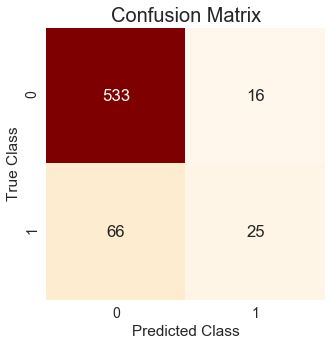

In [57]:
y_pred = svm_baseline.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

#### kernel

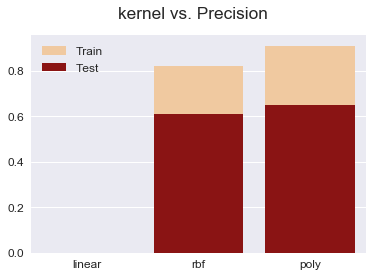

Highest Precision (Train): 0.9090909090909091 (kernel = poly)
Highest Precision (Test): 0.6486486486486487 (kernel = poly)


In [58]:
kernels = ['linear', 'rbf', 'poly']
clf_list = []
for kernel in kernels:
    clf = SVC(kernel = kernel, random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'kernel', barplot = True)

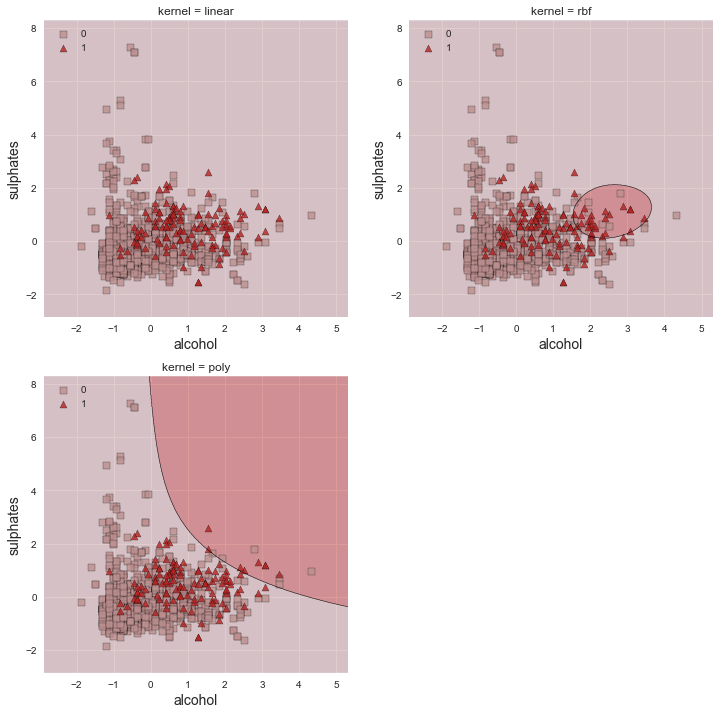

In [59]:
kernels = ['linear', 'rbf', 'poly']
clf_list = []
for kernel in kernels:
    clf = SVC(kernel=kernel, random_state = 10)
    clf_list.append(clf)
    
see_decision_boundaries(clf_list = clf_list, 
                        param = 'kernel', 
                        figsize = (12,12), 
                        nrows = 2, 
                        ncols = 2)

Despite the 'poly' kernel having the highest score, I believe that the 'rbf' kernel best characterizes the shape of the decision boundary.

#### gamma

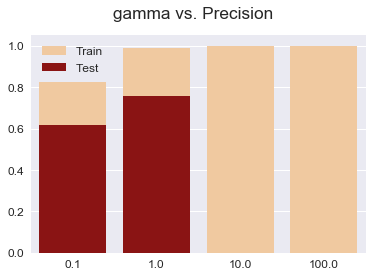

Highest Precision (Train): 1.0 (gamma = 10)
Highest Precision (Test): 0.7575757575757576 (gamma = 1)


In [60]:
gammas = [0.1, 1, 10, 100]
clf_list = []
for gamma in gammas:
    clf = SVC(gamma = gamma, kernel = 'rbf', random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'gamma', barplot = True)

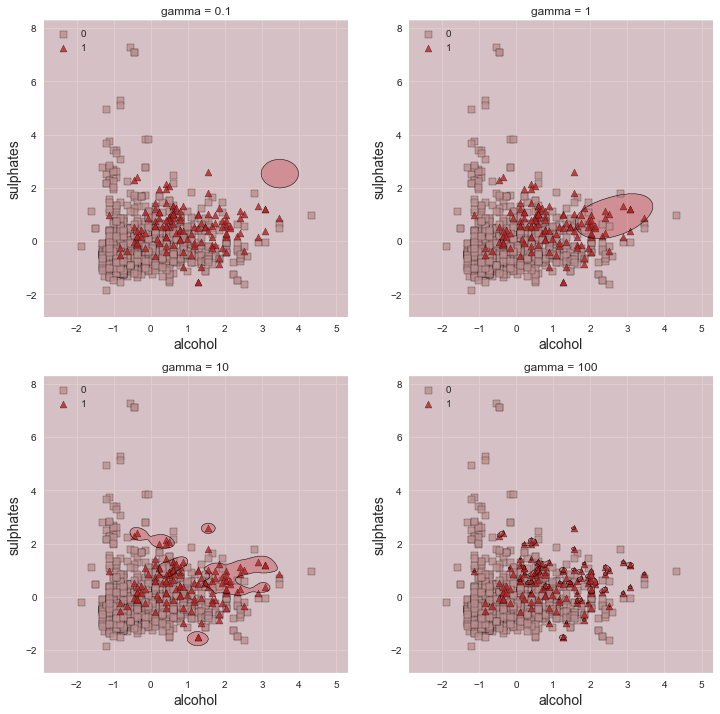

In [61]:
gammas = [0.1, 1, 10, 100]
clf_list = []
for gamma in gammas:
    clf = SVC(kernel='rbf', gamma = gamma, random_state = 10)
    clf_list.append(clf)
    
see_decision_boundaries(clf_list = clf_list, 
                        param = 'gamma', 
                        figsize = (12,12), 
                        nrows = 2, 
                        ncols = 2)

Performance is best when gamma = 1. When gamma > 1, it starts to overfit the dataset.

#### C

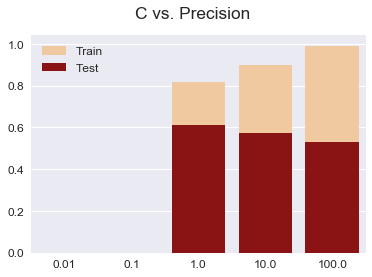

Highest Precision (Train): 0.9915254237288136 (C = 100)
Highest Precision (Test): 0.6097560975609756 (C = 1)


In [62]:
c_list = [0.01, 0.1, 1, 10, 100]
clf_list = []
for c in c_list:
    clf = SVC(C = c, kernel = 'rbf', random_state=12)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'C', barplot = True)

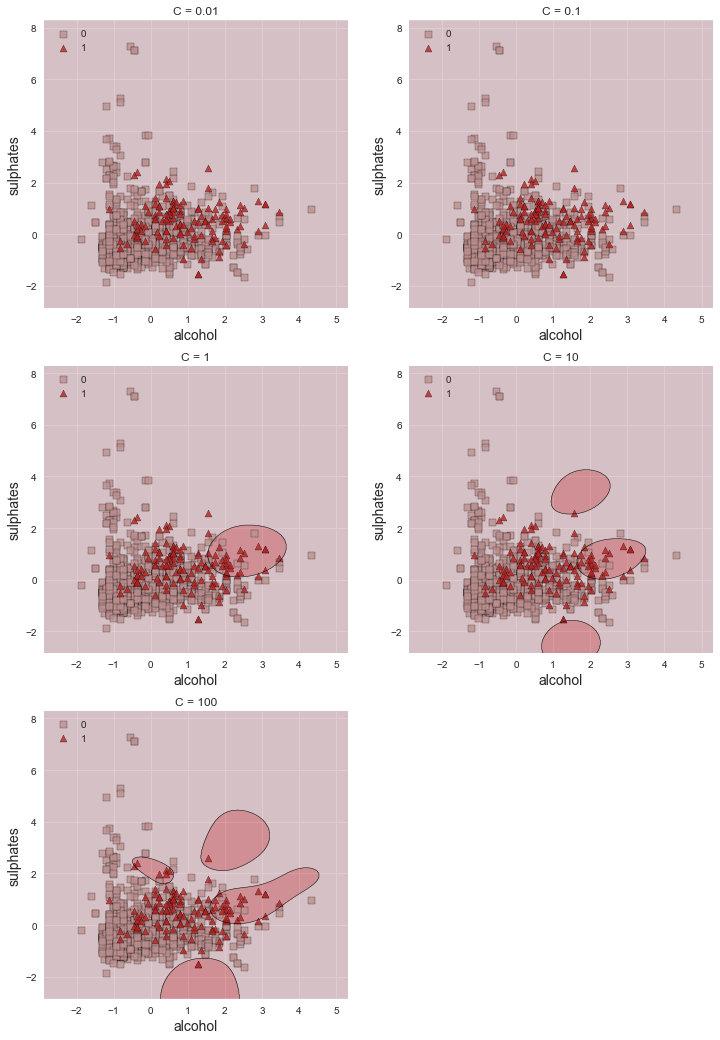

In [63]:
c_list = [0.01, 0.1, 1, 10, 100]
clf_list = []
for c in c_list:
    clf = SVC(kernel='rbf', C = c, random_state = 10)
    clf_list.append(clf)
    
see_decision_boundaries(clf_list = clf_list, 
                        param = 'C', 
                        figsize = (12,18), 
                        nrows = 3, 
                        ncols = 2)  

Performance is best when C = 1. Again, similarly to gamma, the model starts to overfit for values C > 1.

In [64]:
svm = SVC(kernel = 'rbf',
          gamma = 1,
          C = 1,
          random_state = 10)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('-- SVM Tuned Hyperparameters --')
print(classification_report(y_test, y_pred, digits = 3))

-- SVM Tuned Hyperparameters --
             precision    recall  f1-score   support

          0      0.891     0.985     0.936       549
          1      0.758     0.275     0.403        91

avg / total      0.872     0.884     0.860       640



Increased precision by 14%!

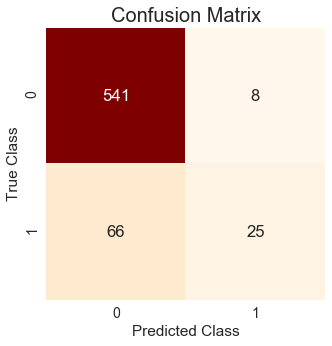

In [65]:
y_pred = svm.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Model Selection (using cross validation)

We will now evaluate our models using 10-fold cross-validation. The model with the best cross-validation score will be the model we select.

In [67]:
# using our tuned parameter models
models = [rf, logit, svm]
index = ['Random Forest', 'Logistic Regression', 'Support Vector Machines']
scores=[]
for model in models:
    score = np.mean(cross_val_score(model, X_test, y_test, scoring = 'precision', cv=10))
    scores.append(score)
results = pd.Series(scores, index=index)
results.sort_values(ascending=False)

Support Vector Machines    0.833333
Logistic Regression        0.589048
Random Forest              0.300000
dtype: float64

We see that Support Vector Machines has the highest score! This comes as no suprise, as when we were doing our hyperparameter tuning, Support Vector Machines was able to define a boundary that most clearly incapsulates the relationship between 'good' and 'bad' wines.

## Conclusion
WILL ADD SOON

### Ways to improve
1. Grid Search for optimal parameters
2. Gather more samples and see if we can evaluate on a different metric (once classes are balanced).